# Sentiment Analysis with Random Forest - Steam Game Reviews in Pt-Br

## Dataset Creation

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

Import the positive reviews full dataset

In [2]:
pos_data_path = "datasets/pos.txt"
pos_dataset = pd.read_fwf(pos_data_path, widths=[10000], header=None, names=['reviews'], engine='python', sep="")
pos_dataset['sentiment'] = 1

print(pos_dataset.shape)
pos_dataset.head()

(52754, 2)


,reviews,sentiment
0,Meu amigo eu tenho quase 1k de horas desse jog...,1
1,"Tiros, explosões e bom humorUm fato que fiquei...",1
2,Oe! Aqui esta a minha sincera opnião ao jogo E...,1
3,"eu gosto desse jogo, quem quiser me ad pra noi...",1
4,"MANO, mt bom, so digo isso, vale mt apena baix...",1


Import the negative reviews full dataset

In [3]:
neg_data_path = "datasets/neg.txt"
neg_dataset = pd.read_fwf(neg_data_path, widths=[10000], header=None, names=['reviews'], engine='python', sep="")
neg_dataset['sentiment'] = 0

print(neg_dataset.shape)
neg_dataset.head()

(17741, 2)


,reviews,sentiment
0,Vamos analisar esse jogo. Depois de horas de j...,0
1,"Eu costumava jogar Tf2 há muito tempo, mas ago...",0
2,você pode perder amigos com esse jogo,0
3,valve me esplica o do porque voces tirarao alt...,0
4,"Não consigo jogar, diz que necessito do cd key...",0


Creating the dataset with 10k positive and 10k negative reviews

In [4]:
reviews_dataset = pd.concat([pos_dataset.iloc[:10000], neg_dataset.iloc[0:10000]], axis=0)

reviews_dataset

,reviews,sentiment
0,Meu amigo eu tenho quase 1k de horas desse jog...,1
1,"Tiros, explosões e bom humorUm fato que fiquei...",1
2,Oe! Aqui esta a minha sincera opnião ao jogo E...,1
3,"eu gosto desse jogo, quem quiser me ad pra noi...",1
4,"MANO, mt bom, so digo isso, vale mt apena baix...",1
...,...,...
9995,um dos piores dirty qe já joguei em toda minha...,0
9996,jogo lixo. uma merda,0
9997,pessimo. comprei e não roda da como o servidor...,0
9998,LIXO tem propaganda de amd,0


<AxesSubplot:ylabel='sentiment'>

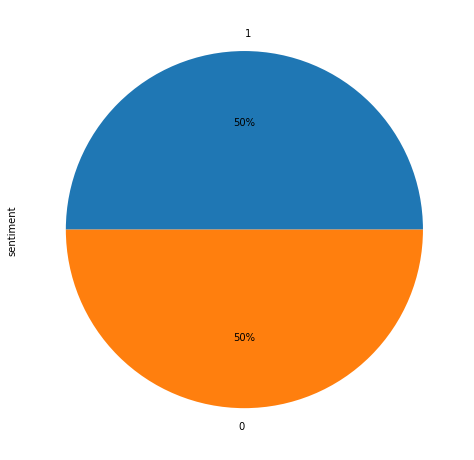

In [5]:
plt.rcParams["figure.figsize"] = [8,10] 
reviews_dataset.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

Spliting the data / labels

In [6]:
X = reviews_dataset["reviews"]
y = reviews_dataset["sentiment"]

In [7]:
def clean_text(doc):
    document = re.sub('[^a-zA-Z]', ' ', doc)
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
    document = re.sub(r'\s+', ' ', document)
    return document

Cleaning the text

In [8]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

## TF-IDF vectors generation

In [9]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Max of 1000 most ocurring words
# the word must ocurr at least min_df = 3 times across the documents
# Do not include words that ocurr in more than 70% (max_df) of docs (too common)
vectorizer = TfidfVectorizer (max_features=1000, min_df=3, max_df=0.7, stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(X_sentences).toarray()

Splitting the data in train and test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=666)

## Training the Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=666 , verbose=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=666)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1631  405]
 [ 320 1644]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2036
           1       0.80      0.84      0.82      1964

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

0.81875


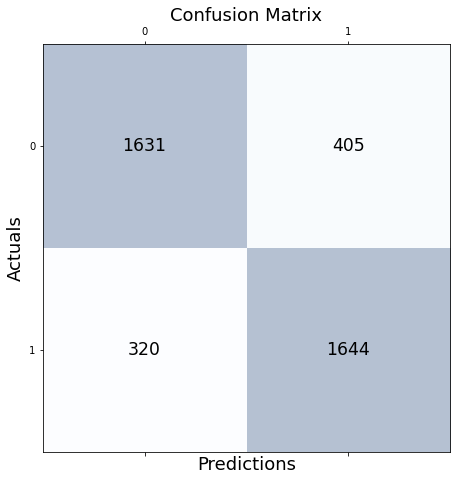

In [14]:
# Print the confusion matrix using Matplotlib
conf_matrix = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Testing with some sentences

In [15]:
def pos_or_neg(review):
    res = clf.predict(vectorizer.transform([review]))
    if res == 1:
        return "Estimativa: Review Positiva"
    return "Estimativa: Review Negativa"

In [16]:
print(pos_or_neg("Esse jogo é uma baita porcaria"))

Estimativa: Review Negativa


In [17]:
print(pos_or_neg("Carai, que game maravilhoso"))

Estimativa: Review Positiva


In [18]:
print(pos_or_neg("puta que pariu mano, que bosta"))

Estimativa: Review Negativa


### Original study results comparison

Ours:

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2036
           1       0.80      0.84      0.82      1964

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



Theirs: \
\
Larissa Britto and Luciano Pacífico \
Evaluating Video Game Acceptance in Game Reviews using Sentiment Analysis Techniques \
XIX Simpósio Brasileiro de Games e Entretenimento Digital (SBGames), 2020, SBC, Porto Alegre, RS, Brasil

Tech | Accuracy | Precision | Recall | F-measure | Execution Time
--|--|--|--|--|--
SVM | 0.7488 ± 0.0343 | 0.7152 ± 0.0474 | 0.8283 ± 0.0387 | 0.7666 ± 0.0343 | 2.2864 ± 0.4422
RF | 0.7952 ± 0.0292 | 0.7807 ± 0.0453 | 0.8211 ± 0.0400 | 0.7994 ± 0.0330 | 1.9811 ± 0.0879
LR | 0.8132 ± 0.0291 | 0.8097 ± 0.0437 | 0.8185 ± 0.0402 | 0.8132 ± 0.0329 | 0.9034 ± 0.3565